/Users/Irbin/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:76: DeprecationWarning: :func:`getFacesRight` is deprecated, use the :attr:`facesRight` property instead!
/Users/Irbin/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:76: DeprecationWarning: :func:`getFacesTop` is deprecated, use the :attr:`facesTop` property instead!
/Users/Irbin/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:77: DeprecationWarning: :func:`getFacesLeft` is deprecated, use the :attr:`facesLeft` property instead!
/Users/Irbin/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:77: DeprecationWarning: :func:`getFacesBottom` is deprecated, use the :attr:`facesBottom` property instead!
/Users/Irbin/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:79: DeprecationWarning: :func:`getFacesRight` is deprecated, use the :attr:`facesRight` property instead!
/Users/Irbin/anaconda3/envs/py27/lib/python2.7/site-package

steps: 1
steps: 2
steps: 3
steps: 4
steps: 5
steps: 6
steps: 7
steps: 8
steps: 9
steps: 10
steps: 11
steps: 12
steps: 13
steps: 14
steps: 15
steps: 16
steps: 17
steps: 18
steps: 19
steps: 20
steps: 21
steps: 22
steps: 23
steps: 24
steps: 25
steps: 26
steps: 27
steps: 28
steps: 29
steps: 30
steps: 31
steps: 32
steps: 33
steps: 34
steps: 35
steps: 36
steps: 37
steps: 38
steps: 39
steps: 40


()

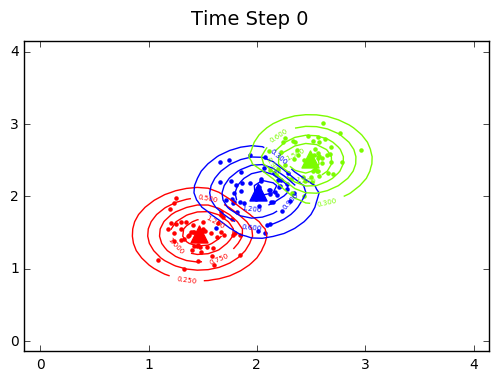

In [113]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

from fipy import *
from matplotlib.mlab import bivariate_normal
from numba import jit
%matplotlib inline

#Simulating spatial points: u, sd, n
u1 = np.array([np.random.normal(1.5, .2, 50),
               np.random.normal(1.5, .2, 50)])

u2 = np.array([np.random.normal(2, .2, 50),
               np.random.normal(2, .2, 50)])

u3 = np.array([np.random.normal(2.5, .2, 50),
               np.random.normal(2.5, .2, 50)])

# Setting parameters of the model
beta = 5.
m = 5.

params = np.array([beta, m])

# Function to solve PDEs
def HRMLE(params, u1, u2, u3):
    
    #Grid
    nx = 40
    ny = nx

    dx = .1
    dy = dx
    
    mesh = fipy.Grid2D(nx=nx, ny=ny, dx=dx, dy=dy)
    
    #Parameters
    beta = np.abs(params[0])
    m = np.abs(params[1])
        
    D = 1. # Difusion parameter
    
    #Plot        
    u1x = u1[0]
    u1y = u1[1]
    
    u2x = u2[0]
    u2y = u2[1]
    
    u3x = u3[0]
    u3y = u3[1]
    
        
    # Parameter for plots
    fig = plt.figure()
    ax1 = plt.subplot()
    txt = fig.suptitle('Contour plot', fontsize=14)
    
    # Centers
    u1_center = [np.mean(u1x), np.mean(u1y)]
    u2_center = [np.mean(u2x), np.mean(u2y)]
    u3_center = [np.mean(u3x), np.mean(u3y)]
    
    
    # Initial Conditions
    x, y = mesh.cellCenters()
    X = x.reshape(nx, -1)
    Y = y.reshape(nx, -1)

    z1 = bivariate_normal(x, y, sigmax=u1x.std(), sigmay=u1y.std(), mux=u1_center[0], muy=u1_center[1])
    z2 = bivariate_normal(x, y, sigmax=u2x.std(), sigmay=u2y.std(), mux=u2_center[0], muy=u2_center[1])
    z3 = bivariate_normal(x, y, sigmax=u3x.std(), sigmay=u3y.std(), mux=u3_center[0], muy=u3_center[1])
    
    # Boundary Conditions
    facesTopRight = ((mesh.getFacesRight()) | (mesh.getFacesTop()))
    facesBottomLeft = ((mesh.getFacesLeft())| (mesh.getFacesBottom()))

    BCs = (fipy.FixedFlux(faces=mesh.getFacesRight(), value=0.),
           fipy.FixedFlux(faces=mesh.getFacesLeft(), value=0.),
           fipy.FixedFlux(faces=mesh.getFacesTop(), value=0.),
           fipy.FixedFlux(faces=mesh.getFacesBottom(), value=0.))
    
    # Unit vector
    u1 = fipy.CellVariable(name="Individuo 1", mesh=mesh, hasOld=True, value=z1)
    u2 = fipy.CellVariable(name="Individuo 2", mesh=mesh, hasOld=True, value=z2)
    u3 = fipy.CellVariable(name="Individuo 3", mesh=mesh, hasOld=True, value=z3)
    
    
    p1 = fipy.CellVariable(name="Marcas Individuo 1", mesh=mesh, hasOld=True, value=z1)
    p2 = fipy.CellVariable(name="Marcas Individuo 2", mesh=mesh, hasOld=True, value=z2)
    p3 = fipy.CellVariable(name="Marcas Individuo 3", mesh=mesh, hasOld=True, value=z3)
    
    # Advection parameter
    C1 = fipy.CellVariable(mesh=mesh, rank=1)
    C1[:] = beta
    C1.setValue(-beta, where = (x > u1_center[0]) * [[[1], [0]]])
    C1.setValue(-beta, where = (y > u1_center[1]) * [[[0], [1]]])
    C1.setValue(0., where = (x == u1_center[0]) * [[[1], [0]]])
    C1.setValue(0., where = (y == u1_center[1]) * [[[0], [1]]])
    
    C2 = fipy.CellVariable(mesh=mesh, rank=1)
    C2[:] = beta
    C2.setValue(-beta, where = (x > u2_center[0]) * [[[1], [0]]])
    C2.setValue(-beta, where = (y > u2_center[1]) * [[[0], [1]]])
    C2.setValue(0., where = (x == u2_center[0]) * [[[1], [0]]])
    C2.setValue(0., where = (y == u2_center[1]) * [[[0], [1]]])
    
    C3 = fipy.CellVariable(mesh=mesh, rank=1)
    C3[:] = beta
    C3.setValue(-beta, where = (x > u3_center[0]) * [[[1], [0]]])
    C3.setValue(-beta, where = (y > u3_center[1]) * [[[0], [1]]])
    C3.setValue(0., where = (x == u3_center[0]) * [[[1], [0]]])
    C3.setValue(0., where = (y == u3_center[1]) * [[[0], [1]]])
    
    # Transient formulation
    equ1 = fipy.TransientTerm(var=u1) == fipy.DiffusionTerm(coeff=D, var=u1) - \
                                        fipy.ConvectionTerm(coeff=C1*(p2+p3), var=u1)
        
    equ2 = fipy.TransientTerm(var=u2) == fipy.DiffusionTerm(coeff=D, var=u2) - \
                                        fipy.ConvectionTerm(coeff=C2*(p1+p3), var=u2)
    
    equ3 = fipy.TransientTerm(var=u3) == fipy.DiffusionTerm(coeff=D, var=u3) - \
                                        fipy.ConvectionTerm(coeff=C3*(p1+p2), var=u3)
    
        
    eqp1 = fipy.TransientTerm(var=p1) == u1*(1 + (p2+p3)*m) - p1
    
    eqp2 = fipy.TransientTerm(var=p2) == u2*(1 + (p1+p3)*m) - p2
    
    eqp3 = fipy.TransientTerm(var=p3) == u3*(1 + (p1+p2)*m) - p3
     
    eqn = (equ1&equ2&equ3 & eqp1&eqp2&eqp3)
    
    #Solving Transient term
    timeStepDuration = .001
    steps = 40
    t = timeStepDuration * steps
    
    txt.set_text(r'Time Step 0')    
        
    for step in range(steps):
        
        u1.updateOld()
        u2.updateOld()
        u3.updateOld()
        
        p1.updateOld()
        p2.updateOld()
        p3.updateOld()
                
        eqn.sweep(dt=timeStepDuration, boundaryConditions = BCs)    
        print 'steps:', step+1
    
    # Plotting the results
    if __name__ == '__main__':
        
        # Points
        sc1 = ax1.scatter(u1x, u1y, color='r', s=5)
        sc2 = ax1.scatter(u2x, u2y, color='b', s=5)
        sc3 = ax1.scatter(u3x, u3y, color='#7cfc00', s=5)
        
        # Contour lines
        cs1=ax1.contour(X, Y, u1.value.reshape(nx, -1), 5, colors='r')
        cs2=ax1.contour(X, Y, u2.value.reshape(nx, -1), 5, colors='b')
        cs3=ax1.contour(X, Y, u3.value.reshape(nx, -1), 5, colors='#7cfc00')
        
        # Centers
        c1 = ax1.scatter(u1_center[0], u1_center[1], color='r', marker='^', s =150)
        c2 = ax1.scatter(u2_center[0], u2_center[1], color='b', marker='^', s =150)
        c3 = ax1.scatter(u3_center[0], u3_center[1], color='#7cfc00', marker='^', s =150)
        
        # Contour labels
        ax1.clabel(cs1, fontsize=5, inline=1)
        ax1.clabel(cs2, fontsize=5, inline=1)
        ax1.clabel(cs3, fontsize=5, inline=1)
        
    # Setting outputs
    
    #log1 = np.log(u1.value[valuesu1[1]])
    #log2 = np.log(u2.value[valuesu2[1]])
    #log3 = np.log(u3.value[valuesu3[1]])
    
    #sum1 = np.sum(log1)
    #sum2 = np.sum(log2)
    #sum3 = np.sum(log3)
    
    #loglink = (sum1+sum2+sum3+sum4+sum5)*-1
    #return(loglink)
    return()

# Using the function to calculate home range
HRMLE(params, u1, u2, u3)